# Workshop n°1

*Links : https://www.tensorflow.org/tutorials/quickstart/beginner & https://www.tensorflow.org/tutorials/keras/classification*

This notebook uses TensorFlow and the Keras API to create an image classification model on the Fashion MNIST dataset, which contains images of clothing.

This Fashion MNIST dataset contains 70,000 images, in grayscale, divided into 10 categories, and showing individual clothes at low resolution (28x28 pixels):

![image.png](https://cdn.discordapp.com/attachments/822939064537317376/1288228021215428720/fashion-mnist-sprite.png?ex=66f46b56&is=66f319d6&hm=8a099e284e6086744f4350b4f3fc4ed6bcda75970d02f786a73d768192214c5f&)

## Import of libraries

In [33]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split

## Import of the Dataset

We load our dataset, divided into 2 sets, with the function '*load_data*', which is unfortunately not parameterizable...

Each image (table NumPy 28x28, with pixel values ranging from 0 to 255) is associated with a single label (each corresponding to an integer, ranging from 0 to 9), corresponding to its class of clothing. They are given a 'class name' for ease.

In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**NB :** To be able to configure our test sets, we can use '*train_test_split*' from sklearn.

In [10]:
# Combine training and test sets
all_images = np.concatenate((train_images, test_images))
all_labels = np.concatenate((train_labels, test_labels))

# Divide data into training, validation and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    all_images, all_labels, test_size=0.4, random_state=42)  # 60% training

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, random_state=42)  # 20% validation, 20% test

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [35]:
# Train Set
print("Train Shape",train_images.shape)             # 60 000 images, 28x28 pixels
print("Lenght Train labels:",len(train_labels))     # 60 000 labels (integer between 0 and 9) 
# test Set
print("Test Shape:",test_images.shape)              # 10 000 images, 28x28 pixels
print("Lenght Test labels",len(test_labels))        # 10 000 labels (integer between 0 and 9)

Train shape: (60000, 28, 28)
lenght train labels: 60000
test shape: (10000, 28, 28)
lenght test labels 10000


## Data Preprocessing

Data must be pre-processed before forming the network.

For example, if you look at the first image of the learning set, you can see that the pixel values are between 0 and 255 (corresponding to its color).

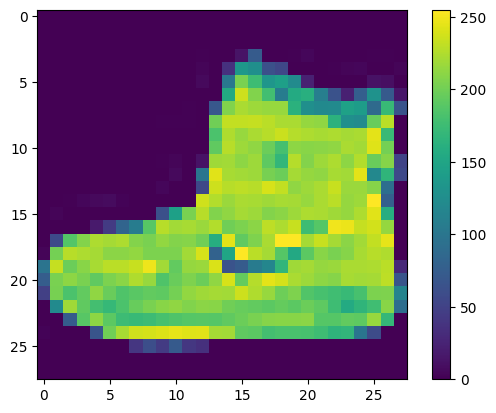

In [36]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We normalize images by dividing pixel values by 255 to a range of 0 to 1.

It is important that the learning set and test set are pre-processed **same way**:

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and ready to build and train the network, we display the first 25 images of the learning set and the class name under each image.

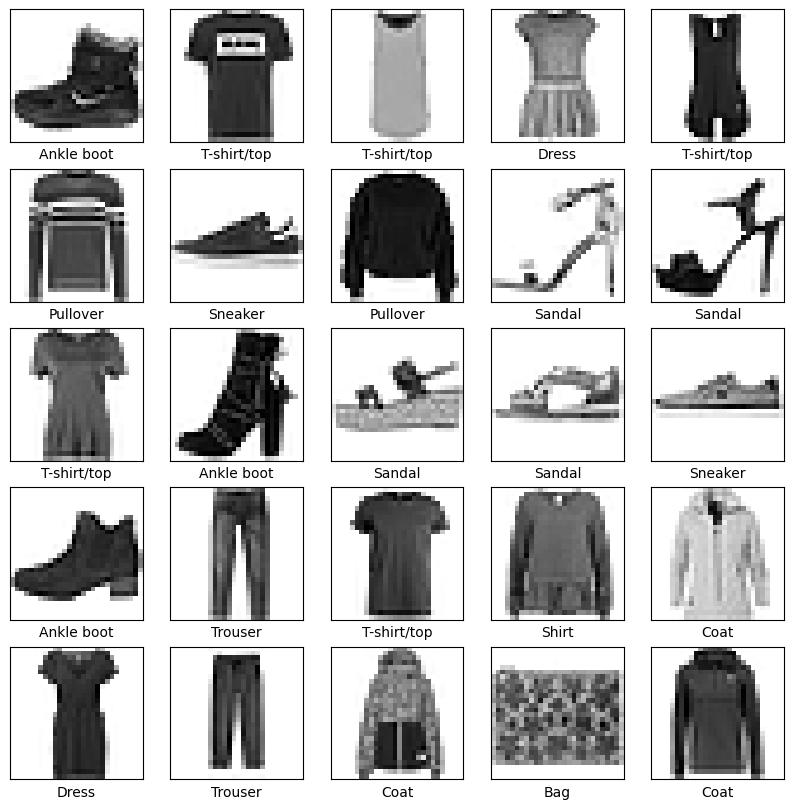

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Building
The basic building block of a neural network is the **layer**. Layers extract representations of the data that are introduced into them.

The essence of deep learning is to chain simple layers. Most layers, such as '*tf.keras.layers.Dense*', have parameters learned during training.

Here, we build a sequential model with one flattening layer and 2 'dense' layers (the second is our output layer).

In [39]:
# First Layer 'Flatten': transform a multidimensional tensor (our images, in 2D) into a unidimensional vector (1D)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
])

Fashion MNIST images are represented as 28x28 pixels tables, but dense layers (fully connected layers) are waiting for input in the form of vectors. The 'Flatten' layer therefore flattens each image into a vector of 784 pixels (28*28=784).

In [40]:
# Second Layer 'Dense': a densely connected, or fully connected, neural layers of 128 nodes/neurons
model.add(tf.keras.layers.Dense(128, activation='relu')) 

The ReLU (Rectified Linear Unit) activation function is applied, which transforms the output of the layer into max(0, x). This introduce non-linearity into the model and allows to learn complex patterns better. This layer learns representations from flattened input data.

In [41]:
# Third Layer 'Dense' : returns a logits array with length of 10. 
model.add(tf.keras.layers.Dense(10)) 

Each of the 10 nodes output contains a score that indicates the current image belongs to one of the 10 classes.

In [42]:
# To Sum Up
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation of the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
- Optimizer : This is how the model is updated based on the data it sees and its loss function.
- Loss function : This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Metrics : Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

### Choosing our Optimizer
    An optimizer is an algorithm or method used to update the weights and biases of a machine learning model in order to minimize the loss function. The loss function measures how far the predictions of a model deviate from the actual values. In other words, the optimizer guides the learning process by adjusting the model’s parameters to improve its performance.

| Optimizer                | Description                                                                                  | Benefits                                                                                     | Drawbacks                                                   | Fonction                                       |
|--------------------------|----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|---------------------------------------------------------------|--------------------------------------------------|
| **SGD** (Stochastic Gradient Descent) | A basic optimizer that updates weights in small batches. | Simple to understand and implement, good performance on well-defined problems. | May be slow to converge, sensitive to learning rate selection. | Linear regression, simple networks.           |
| **Momentum** | Improves SGD by adding "memory" of past gradients to speed up convergence.  | Helps to cross "narrow valleys", reduces oscillations. | May require setting of hyperparameters. | Deep neural networks, SGD optimization.|
| **Nesterov Momentum** | Momentum variant that calculates the gradient at the anticipated position.| Faster than the classic Momentum.  | May require setting of hyperparameters. | Similar issues to Momentum. |
| **AdaGrad** | Adapts the learning rate for each parameter based on the historical gradients. | Effective for rare data, automatically adjusts the learning rate. | May lead to very low learning rates. | NLP (Natural Language Processing) models, sparse neural networks. |
| **RMSProp** | An AdaGrad enhancement that uses an adaptive learning rate based on the average of recent gradients. | Very effective for neural network problems, handles oscillations well. | May require setting of hyperparameters. | Deep neural networks, non-stationary problems. |
| **Adam** | Combines the benefits of Momentum and AdaGrad. | Fast convergence, generally good without much adjustment. | May be sensitive to learning rate settings. | Commonly used for most ML problems. |
| **AdamW** | Adam’s variant which applies a regularization weight in a different way. | Improves regularization and generalization. | More complex than the classic Adam. | Models with overfitting, deep applications. |
| **Nadam** | Combine Adam and Nesterov Momentum. | Benefits from both methods.  | More heavy calculating than Adam.  | Similar problems to those of Adam. |
| **FTRL** (Follow The Regularized Leader.)  |  Used for large data sets and online processing. | Effective for large-scale problems. | May be complex to configure.  | Online models, large problems.  |
| **AdaDelta**  | An AdaGrad enhancement that does not require a learning rate.  | Automatic, without learning rate adjustment.  | More complex than other methods.  | Varied problems, deep patterns.  |


For the rest of the workshop, we will choose to take the **"Adam" Optimizer** which is the most common for machine learning problems.

***NB** : this does not mean that it is the most optimal, we could use another one.*

## Loss Fonction 
    A Loss Function (or Cost Function) is a criterion that measures how far the predictions of a machine learning model deviate from actual values. It quantifies the error between the outputs predicted by the model and the real labels. The goal of learning is to minimize this function of loss during training.

| Loss Fonction                                  | Description                                                                             | Usage                         | Benefits                                         | Drawbacks                                  |
|---------------------------------------------------|-----------------------------------------------------------------------------------------|-------------------------------------|---------------------------------------------------|------------------------------------------------|
| **Sparse Categorical Crossentropy**   | Used for multi-class classification problems with whole labels (each class in a multi-class classification is associated with an integer number.) | Multi-class classification   | Handles unbalanced classes well.   | Requires full labels.   |
| **Categorical Crossentropy**   | Used for multi-class classification problems with one-hot labels. | Multi-class classification   | Handles unbalanced classes well.   | Requires one-hot tags.   |
| **Binary Crossentropy**   | Used for binary classification problems.   | Binary classification   | Simple to understand and implement.   | Not suitable for multi-class problems.   |
| **Mean Squared Error (MSE)**   | Used for regression problems.   | Regression   | Simple and intuitive.   | Sensitive to outliers.   |
| **Mean Absolute Error (MAE)**   | Used for regression problems.   | Regression   | Less sensitive to outliers than MSE.   | May be less effective for some problems. |
| **Huber Loss**   | Combines the benefits of MSE and MAE.   | Regression   | Robust against outliers.   | Requires adjustment of the delta parameter.   |
| ***Kullback-Leibler Divergence**   | Measures the divergence between two probability distributions.   | Probabilistic models   | Useful for generative models.   | Complex to interpret.   |
| ***Poisson**   | Used for regression problems where targets are counts.   | Regression (counting data)   | Suitable for models that predict discrete events. | Not suitable for non-positive values.   |


Loss functions play a crucial role in learning machine learning models. The choice of the loss function should be based on the nature of the problem we are trying to solve. Using the right loss function can greatly improve our model’s performance.

For the rest of the workshop, it will be recommended to use **"Sparse Categorical Crossentropy"** for the loss function, because we have whole labels. 

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Entraînement du modèle
Nous entraînons le modèle sur les données d'entraînement pendant 10 époques. 

(c'est la même fonction qu'avec sklearn mais avec un paramètre un peu important en vrai) 

## epochs (Époques)

Une époque représente une itération complète où le modèle a été entraîné sur toutes les données d'entraînement disponibles.
 À chaque époque, le modèle ajuste ses poids en fonction des gradients calculés à partir des erreurs sur les données d'entraînement.

### Pourquoi les Époques sont-elles Importantes ?
Apprentissage Progressif : Chaque époque permet au modèle de s'ajuster de plus en plus aux données, en apprenant les caractéristiques sous-jacentes.

Surajustement : En général, plus il y a d'époques, plus le modèle peut apprendre. Cependant, trop d'époques peuvent conduire au surajustement, où le modèle apprend trop bien les données d'entraînement, mais échoue à généraliser sur de nouvelles données.

Évaluation de la Performance : En surveillant la perte et l'exactitude à chaque époque, tu peux évaluer si le modèle s'améliore et décider si tu dois arrêter l'entraînement.

resumer : c'est des itérations dans l'entrainement du modèle qui peut être et doit être correctement défini pour eviter les problèmes juste au dessus

In [44]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7766 - loss: 0.6367
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8605 - loss: 0.3892
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3411
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8846 - loss: 0.3180
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8916 - loss: 0.2947
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8963 - loss: 0.2826
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9012 - loss: 0.2654
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9063 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9068 - loss: 0.2518
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9079 - loss: 0.2430


### Évaluation du modèle
Pareil qu'avant on évalue les performances du modèle pour savoir si on est fort ou pas 

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8772 - loss: 0.3514

Test accuracy: 0.8772000074386597


## Fonction d'Activation

Une fonction d'activation est une fonction mathématique appliquée à la sortie d'un neurone dans un réseau de neurones. Elle détermine si le neurone doit s'activer ou non en introduisant de la non-linéarité dans le modèle. Les fonctions d'activation jouent un rôle crucial dans l'apprentissage des modèles en permettant de modéliser des relations complexes.

| Fonction d'Activation   | Description                                                                 | Utilisation                                | Avantages                                   | Inconvénients                              |
|-------------------------|-----------------------------------------------------------------------------|--------------------------------------------|---------------------------------------------|--------------------------------------------|
| **ReLU (Rectified Linear Unit)** | Renvoie 0 pour les entrées négatives et la valeur d'entrée pour les positives. | Couche cachée de réseaux neuronaux        | Simple et rapide, réduit le risque de vanishing gradient. | Peut causer des "neurons morts".         |
| **Leaky ReLU**         | Variante de ReLU qui permet une petite pente pour les valeurs négatives.  | Couche cachée                              | Résout le problème des "neurons morts".    | Pas toujours performant dans tous les contextes. |
| **Sigmoid**            | Renvoie une valeur entre 0 et 1, souvent utilisée pour les sorties binaires. | Couche de sortie pour la classification binaire | Interprétable comme une probabilité.      | Risque de vanishing gradient, non centré. |
| **Tanh (Tangente Hyperbolique)** | Renvoie une valeur entre -1 et 1.                                       | Couche cachée                              | Centré autour de 0, améliore la convergence. | Risque de vanishing gradient.              |
| **Softmax**            | Transforme les logits en probabilités sur les classes, utilisée en sortie. | Couche de sortie pour la classification multi-classes | Fournit des probabilités normalisées.      | Sensible aux valeurs extrêmes (outliers). |
| **ELU (Exponential Linear Unit)** | Renvoie une valeur négative pour les entrées négatives et suit une courbe exponentielle. | Couche cachée                              | Aide à éviter les "neurons morts".         | Plus coûteux en calcul par rapport à ReLU. |
| **Swish**              | Produit de la valeur d'entrée et de la fonction sigmoid.                  | Couche cachée                              | Performances améliorées dans certains cas. | Plus complexe à calculer que ReLU.        |
| **GELU (Gaussian Error Linear Unit)** | Fonction qui combine la ReLU et la courbe gaussienne.              | Réseaux de neurones avancés                | Performances prometteuses pour les modèles modernes. | Moins connue, peut nécessiter des tests.   |


### Conclusion 

Softmax est idéale pour ce type de problème, car elle produit une distribution de probabilités sur ces 10 classes.

In [46]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# Effectuer des prédictions sur les images de test
predictions = probability_model.predict(test_images)

print("Probabilités prédites pour la première image :", predictions[0])

predicted_label = np.argmax(predictions[0])
print("Classe prédite pour la première image :", predicted_label)

real_label = test_labels[0]
print("Classe réelle de la première image :", real_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
Probabilités prédites pour la première image : [9.4962118e-08 9.5347787e-08 9.3700310e-09 2.9340536e-10 1.0206791e-08
 3.7376306e-04 8.3816292e-07 3.5901148e-02 1.9969502e-06 9.6372205e-01]
Classe prédite pour la première image : 9
Classe réelle de la première image : 9


### Visualisation des prédictions

Nous visualisons quelques prédictions pour mieux comprendre le modèle.

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [48]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

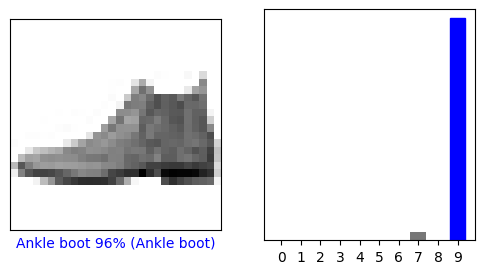

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


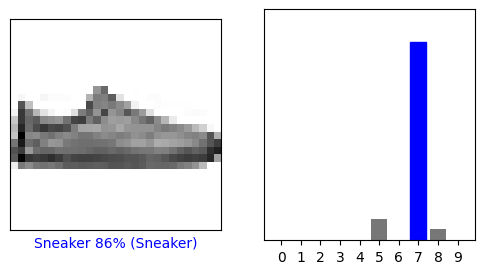

In [50]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

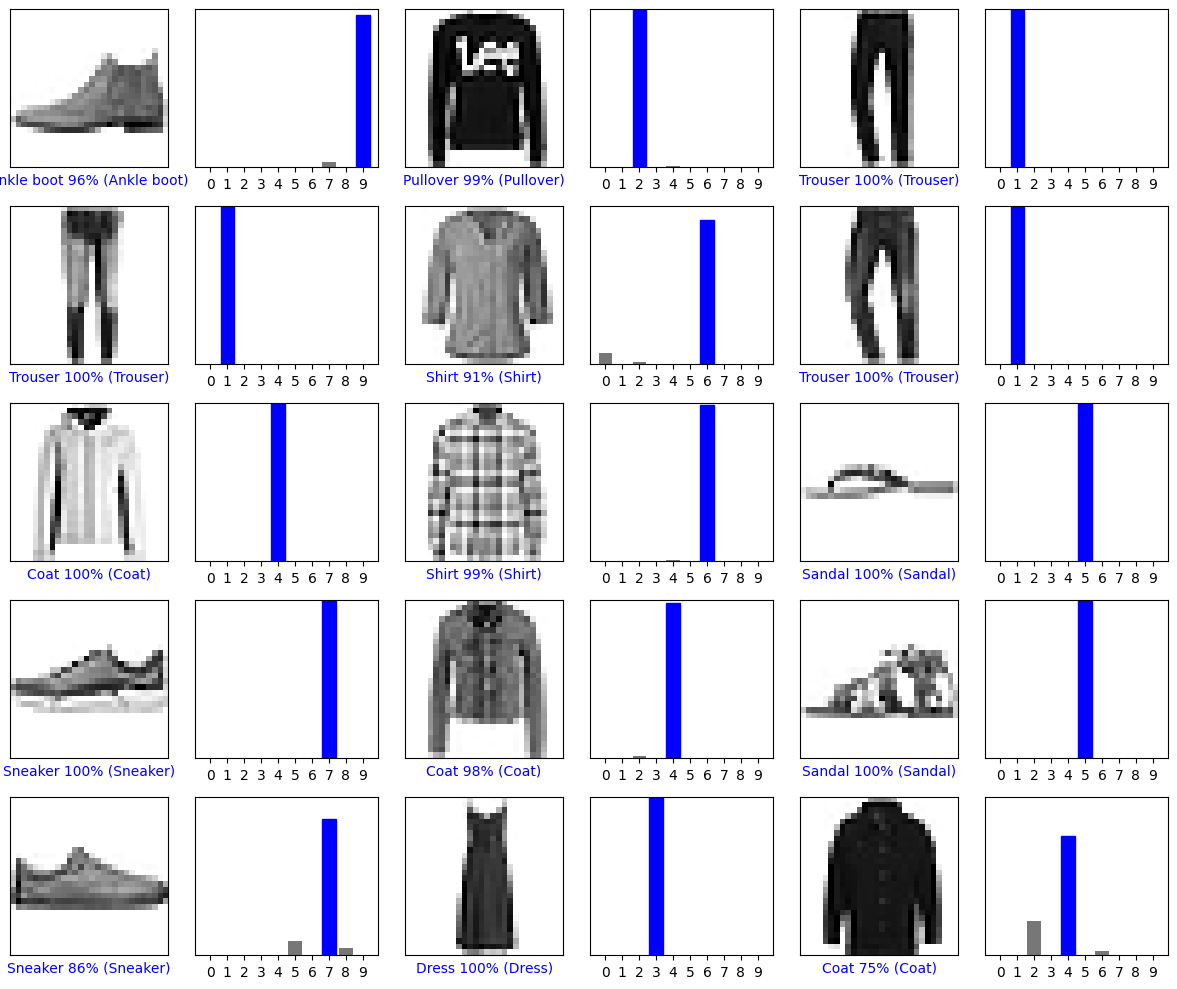

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Prédictions sur une image unique

Nous extrayons une image du jeu de test pour voir sa prédiction

shape randome picture (28, 28)
selected shape picture batch: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
prediction selected picture batch: [[3.1844673e-05 1.9802032e-15 9.9327314e-01 6.7558650e-14 6.2967697e-03
  2.0884013e-16 3.9819340e-04 3.2285414e-22 7.7864139e-11 5.2920210e-17]]


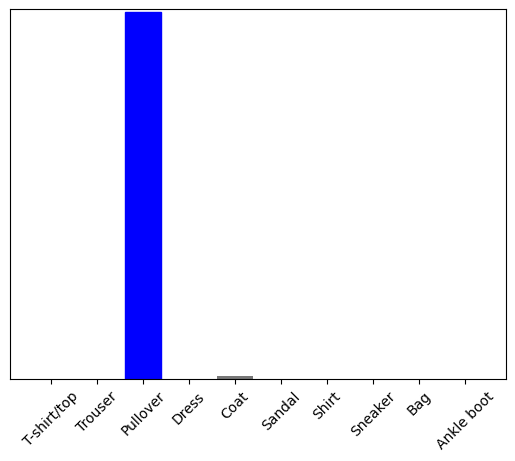

class predicted: 2


In [53]:
img = test_images[1]

print("shape randome picture",img.shape)

img = (np.expand_dims(img,0))

print("selected shape picture batch:",img.shape)

predictions_single = probability_model.predict(img)

print("prediction selected picture batch:",predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print("class predicted:",np.argmax(predictions_single[0]))